In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("data/time_series_covid_19_confirmed.csv")

In [3]:
data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,889,897,897,897,907,907,918,922,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,851,880,916,932,950,1000,1078,1109,1148,1164
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,76,82,82,82,86,86,91,91,91,91
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,148027,153520,158334,162526,167416,173355,178996,185373,191302,196543
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,36162,36613,36996,37317,37390,37629,37937,38196,38550,38841
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3640,3654,3668,3685,3699,3718,3736,3756,3773,3784


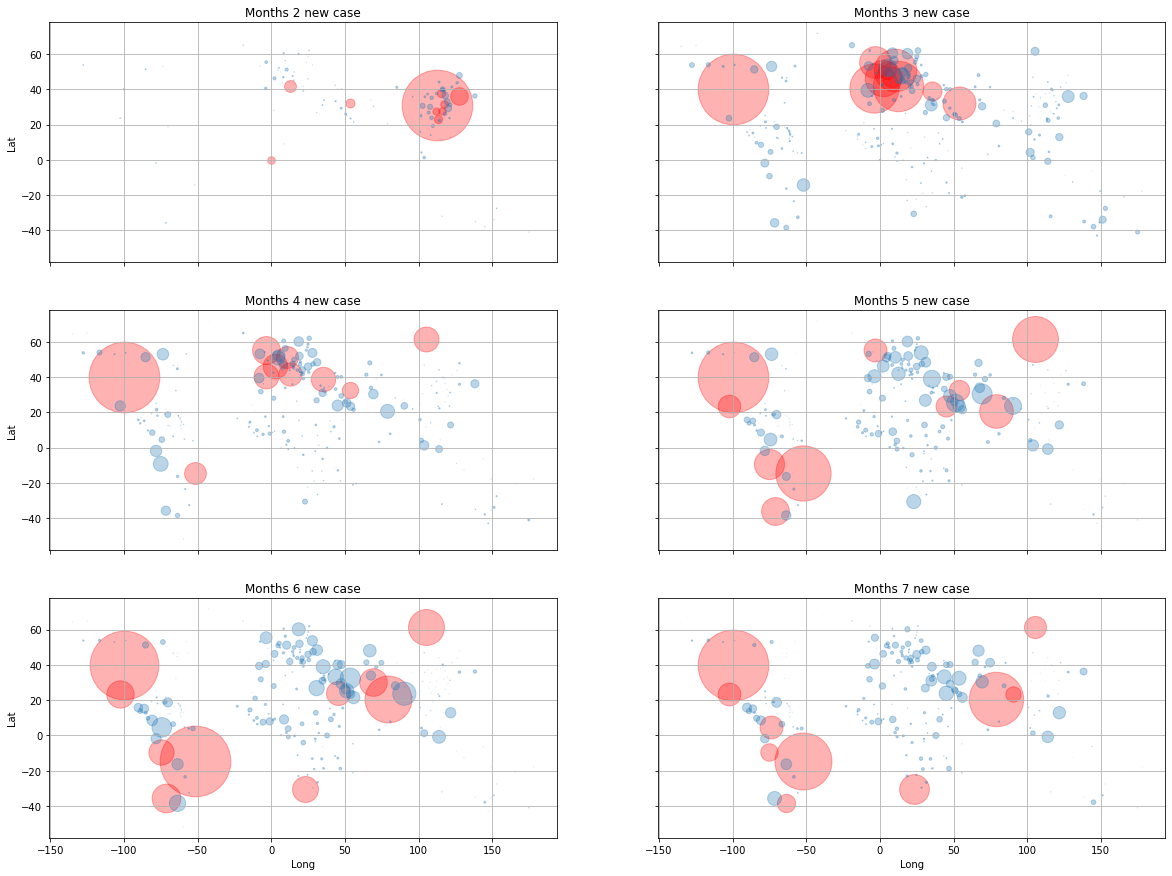

In [4]:
m = 3
latest_day = f"{m}/1/20"
day = f"{m-1}/1/20"

data_2 = data.copy()

fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharex=True, sharey=True)

m = 3
for i in range(3):
    for j in range(2):
        latest_day = f"{m}/1/20"
        day = f"{m-1}/1/20"
        
        
        ax = axs[i, j]
        ax.set_title(f"Months {m - 1} new case")
        data_2["New case"] = data_2[latest_day] - data_2[day]
        # c = data["Country/Region"] == "Vietnam"

        s = data_2["New case"].values
        s = (s - s.min()) / (s.max() - s.min()) * 5000
#        new_case.plot.scatter("Long", "Lat", s = s, ax=ax, alpha=0.3);

        idxs = data_2.nlargest(10, "New case").index    
        top10 = []
        for idx in idxs:
            name = data["Province/State"][idx]
            if type(name) == type(1.0):
                name = ""
            name += "  " + data["Country/Region"][idx]
            top10.append(name)
            ax.scatter(data["Long"][idx], data["Lat"][idx], label=name, s = s[idx], alpha=0.3, c='r')
        m += 1
        
        other_idxs = list(set(data_2.index) - set(idxs))
        other = data_2.iloc[other_idxs]
        other.plot.scatter("Long", "Lat", s = s[other_idxs], ax=ax, alpha=0.3)
        
        ax.grid()